# Model Evaluation and Metrics

In this notebook, we evaluate the performance of the trained models using multiple metrics:
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix
- ROC and AUC (One-vs-Rest)

## Classification Report

We evaluate each class using the standard classification metrics, such as:
- **Precision**
- **Recall**
- **F1-score**      


This gives us a good overview of model performance.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pickle import load
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

resource_folder = 'res'

with open(f'{resource_folder}/datasets.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = load(f)

with open(f'{resource_folder}/model.pkl', 'rb') as f:
    model = load(f)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.81
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       561
           2       0.77      0.78      0.77       586
           3       0.68      0.66      0.67       563
           4       0.86      0.85      0.85       594

    accuracy                           0.81      2304
   macro avg       0.81      0.81      0.81      2304
weighted avg       0.81      0.81      0.81      2304



## Confusion Matrix

We compute a confusion matrix to help us us visualize the number of correct and incorrect predictions for each class.

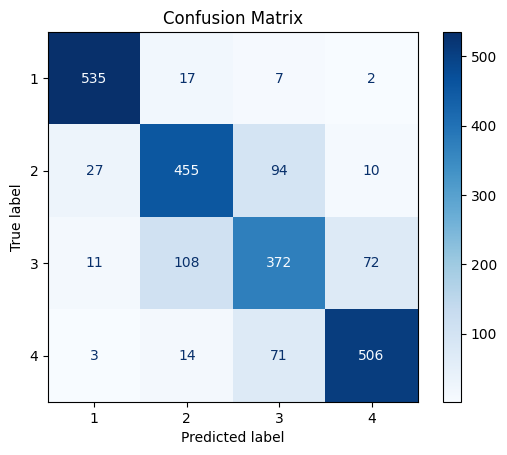

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3,4])

# Visualizza la confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4])
disp.plot(cmap=plt.cm.Blues)  # cmap puoi cambiarlo per i colori

plt.title("Confusion Matrix")
plt.show()


# UAC-ROC curve: One-vs-Rest

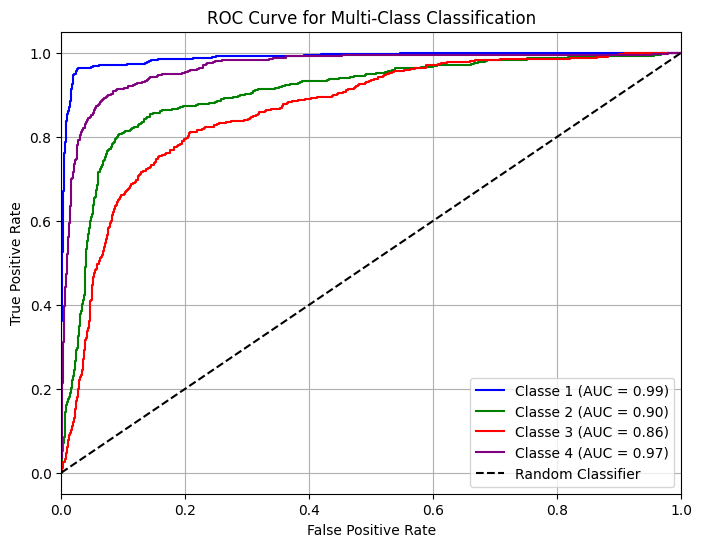

In [19]:
n_classes = 4
y_true_bin = label_binarize(y_test, classes=[1, 2, 3, 4])

fpr = dict()
tpr = dict()
roc_auc = dict()

y_pred_proba = model.predict_proba(X_test)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'purple']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Classe {i+1} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.xlim([0.0, 1.0])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Summary

In this brief notebook it is shown that:
- The model performs well on the minority and high-quality classes, likely due to oversampling.
- Central classes are harder to distinguish, as also seen in the confusion matrix.
- Overall, the MLP model provides a balanced trade-off between precision and recall across all classes.
